# Imports

In [2]:
import math
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tqdm
from shapely.geometry import Polygon
import pickle
import matplotlib.pyplot as plt

# Load data

In [3]:
df = pd.read_csv('geolife_sample.csv', parse_dates=['datetime'])
df.head()

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1


In [4]:
type(df)

pandas.core.frame.DataFrame

# Lat meters conversion

In [5]:
from pymove.core.grid import lat_meters

In [6]:
lat_meters(-3.8162973555)

110826.6722516857

# Create virtual Grid

In [7]:
from pymove.core.grid import create_virtual_grid

In [8]:
from pymove.utils.traj_utils import get_bbox

In [9]:
dic_grid = create_virtual_grid(15, get_bbox(df))


Creating a virtual grid without polygons
...cell size by degree: 0.0001353464801860623
...grid_size_lat_y:140266
grid_size_lon_x:56207

..A virtual grid was created


In [10]:
dic_grid

{'lon_min_x': 113.54884299999999,
 'lat_min_y': 22.147577,
 'grid_size_lat_y': 140266,
 'grid_size_lon_x': 56207,
 'cell_size_by_degree': 0.0001353464801860623}

# Create one polygon to point on grid

In [11]:
from pymove.core.grid import create_one_polygon_to_point_on_grid

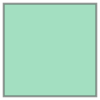

In [12]:
create_one_polygon_to_point_on_grid(dic_grid, 1, 1)

# Create or update index grid feature

In [13]:
from pymove.core.grid import create_update_index_grid_feature

create_update_index_grid_feature(df, dic_grid)


Creating or updating index of the grid feature..

...[217653,217653] indexes were created to lat and lon


# Create all polygons to all point on grid

In [14]:
from pymove.core.grid import create_all_polygons_to_all_point_on_grid

In [11]:
create_all_polygons_to_all_point_on_grid(df, dic_grid)


Creating or updating index of the grid feature..

...[217654,217654] indexes were created to lat and lon



...polygons were created


,index_grid_lat,index_grid_lon,polygon
0,131784,20468,"POLYGON ((39.98407754484003 116.3191147564483,..."
2,131784,20469,"POLYGON ((39.98407754484003 116.3191147564483,..."
3,131785,20470,"POLYGON ((39.98407754484003 116.3192501029285,..."
4,131784,20470,"POLYGON ((39.98421289132022 116.3193854494087,..."
6,131788,20473,"POLYGON ((39.98407754484003 116.3193854494087,..."
...,...,...,...
217585,131908,20499,"POLYGON ((40.01371842400079 116.306527533791, ..."
217588,131908,20501,"POLYGON ((40.01371842400079 116.306527533791, ..."
217590,131908,20502,"POLYGON ((40.01371842400079 116.306527533791, ..."
217616,131909,20518,"POLYGON ((40.01371842400079 116.306527533791, ..."


# Create all polygons on grid

In [15]:
from pymove.core.grid import create_all_polygons_on_grid

In [ ]:
create_all_polygons_on_grid(dic_grid)


Creating all polygons on virtual grid


# Get point to index grid 

In [16]:
from pymove.core.grid import point_to_index_grid

point_to_index_grid(39.984094, 116.319236, dic_grid)

...[1,1] indexes were created to lat and lon


(131784.0, 20468.0)

# Save grid to .pkl

In [17]:
from pymove.core.grid import save_grid_pkl

save_grid_pkl('teste.pkl', dic_grid)


A file was saved


# Read .pkl to grid

In [18]:
from pymove.core.grid import read_grid_pkl

read_grid_pkl('teste.pkl')

{'lon_min_x': 113.54884299999999,
 'lat_min_y': 22.147577,
 'grid_size_lat_y': 140266,
 'grid_size_lon_x': 56207,
 'cell_size_by_degree': 0.0001353464801860623}

# Show a grid polygons

In [20]:
from pymove.core.grid import show_grid_polygons

show_grid_polygons(df, '1')

/home/384341/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


IndexError: single positional indexer is out-of-bounds

<Figure size 720x720 with 0 Axes>

numpy.int64